In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Company_data (1).csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

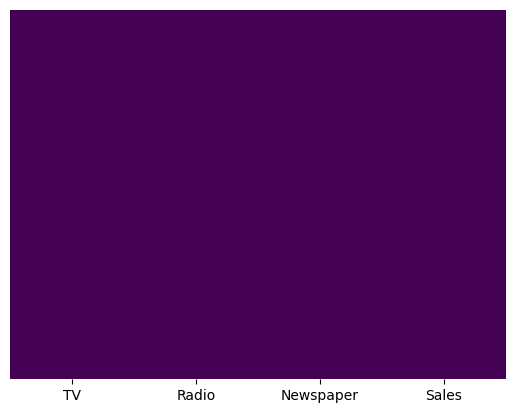

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

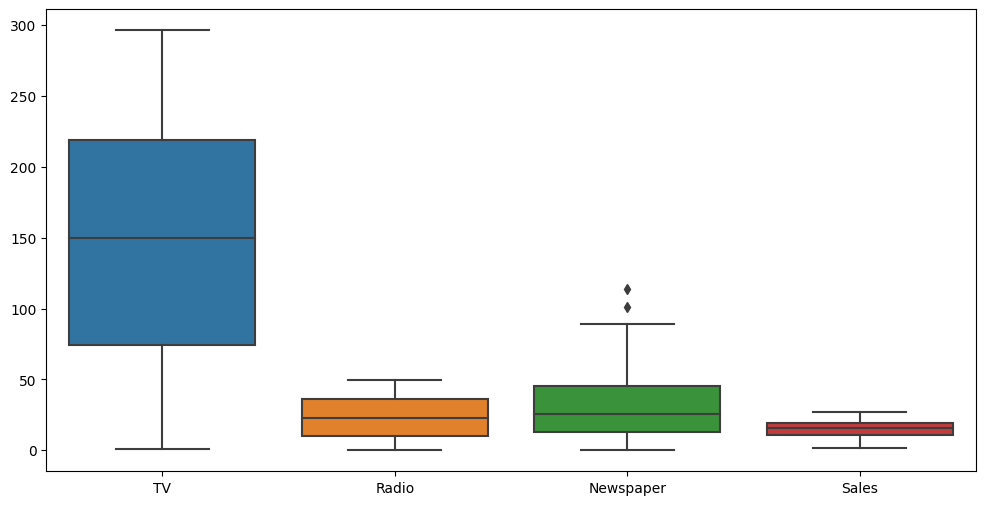

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.show

In [ ]:
q1=data['Newspaper'].quantile(0.25)
q3=data['Newspaper'].quantile(0.75)
iqr=q3-q1
print(iqr)


32.35


In [ ]:
up=q3+1.5*iqr
down=q1-1.5*iqr
print(up,down)

93.625 -35.775000000000006


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

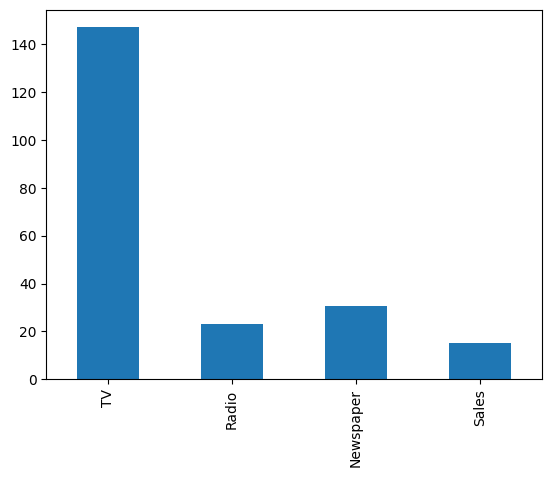

In [ ]:
data.describe().loc['mean'].plot.bar()
plt.show()

In [ ]:
outlier=[]
profit=data["Newspaper"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)

Up Outlier 114.0
Up Outlier 100.9


In [ ]:
data["Newspaper"]=data["Newspaper"].replace(outlier,data["Newspaper"].mean())

In [ ]:
dt=data.corr()

In [ ]:
dt.shape

(4, 4)

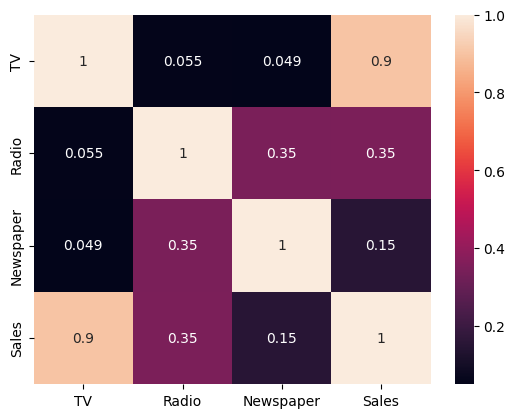

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
X = data['TV'].values
y = data['Sales'].values
print(X.shape,y.shape)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape, y.shape)

(200,) (200,)
(200, 1) (200, 1)


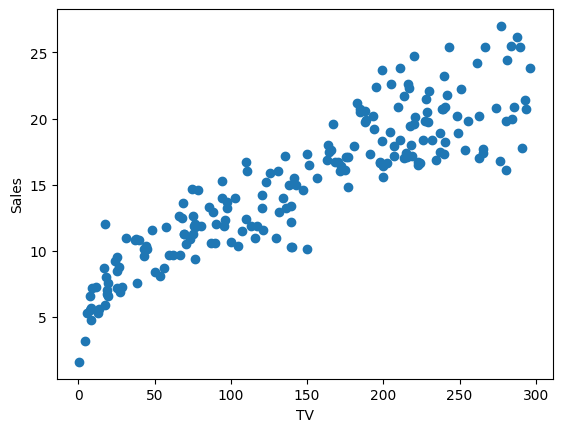

In [ ]:
plt.scatter(X,y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,29.785040,15.130500
std,85.854236,14.846809,20.343446,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,43.550000,19.050000
max,296.400000,49.600000,89.400000,27.000000


In [ ]:
data.describe().loc['mean']

TV           147.04250
Radio         23.26400
Newspaper     29.78504
Sales         15.13050
Name: mean, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=120)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.8381468635971825
MSE : 5.275468636514065
RMSE : 2.2968388355550906
R2_SCORE : 0.8134414966713854


In [ ]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.800278506726766
MSE : 5.133630091035537
RMSE : 2.2657515510389783
R2_SCORE : 0.8003952299407135


In [ ]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.800278506726766
MSE : 5.133630091035537
RMSE : 2.2657515510389783
R2_SCORE : 0.8003952299407135
